<a href="https://colab.research.google.com/github/soeunseon/-/blob/main/(%EC%B5%9C%EC%A2%85%EB%B0%9C%ED%91%9C)_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%8E%98%EC%8A%A4%ED%8B%B0%EB%B2%8C_1%EC%A1%B0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본설정

In [ ]:
# 구글 코랩에 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# 데이터 시각화 하기

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
plt.rcParams["figure.figsize"] = (8, 5)

In [ ]:
# 데이터 탐색
df_sido = pd.read_csv('/content/drive/MyDrive/데이터최/폐기물_발생현황_생활폐기물_20211119155435.csv',encoding='CP949')
df_sigun = pd.read_csv('/content/drive/MyDrive/데이터최/일반폐기물재활용률_시도_시_군_구__20211119152549.csv',encoding='CP949')
df_pay = pd.read_csv('/content/drive/MyDrive/데이터최/TP_LCRCY_USE_ND_INDUTY_DISTRB_20201209152505.csv')
df_pay2 = pd.read_csv('/content/drive/MyDrive/데이터최/지역화폐 발행 및 이용 현황.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 데이터 출처
df_sigun

통계청, 일반폐기물재활용률(시도/시/군/구) https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL21311&conn_path=I2

df_sido

통계청, 폐기물 발생현황_생활폐기물, https://kosis.kr/statHtml/statHtml.do?orgId=106&tblId=DT_106N_99_3300351&conn_path=I2

df_pay

경기지역경제포털, 지역별 지역화폐 사용량 및 지역별 소상공인 분포, https://bigdata-region.kr/#/dataset/cf6c467e-18b9-4d3a-bd10-5e8473434d36

df_pay2

경기데이터드림, 지역화폐 발행 및 이용 현황, https://data.gg.go.kr/portal/data/service/selectServicePage.do?page=1&sortColumn=&sortDirection=&infId=6FEDD6KGEJWYCY2G15OY29527318&infSeq=1&searchWord=%EC%A7%80%EC%97%AD%ED%99%94%ED%8F%90#none



# 데이터 설명

*   waste : 가정에서 배출하는 생활쓰레기의 총량(단위:톤/일)

*   plastic : 생활쓰레기 중 플라스틱 배출량(단위ㅣ톤/일)

    *   플라스틱 : 비닐류(vinyl) + 발포수지류(eps) + 페트병(pet) + 기타(etc)

    *   시군별 플라스틱 배출량 : 폐플라스틱 비율(플라스틱/생활폐기물)을 구해 각 *   시군별의 생활폐기물 총량에 곱함.

*   code : 우편번호

*   payment : 경기지역화폐의 결제수

*   shop : 해당 우편번호를 가진 상가의 수

*   total : 경기지역화폐 발급건수
    *   df_pay가 2019.10 - 2020.06 조사된 데이터라서 동일한 시기의 데이터만 추출해서 사용




# 1. 경기도 시군별 플라스틱 배출량 파악



In [ ]:
# 데이터 복사
df1 = df_sido.copy()
df2 = df_sigun.copy()

In [ ]:
df1.shape
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   시도(1)           3 non-null      object
 1   시점              3 non-null      object
 2   총계              3 non-null      object
 3   재활용가능자원 분리배출    3 non-null      object
 4   재활용가능자원 분리배출.1  3 non-null      object
 5   재활용가능자원 분리배출.2  3 non-null      object
 6   재활용가능자원 분리배출.3  3 non-null      object
dtypes: object(7)
memory usage: 296.0+ bytes


,시도(1),시점,총계,재활용가능자원 분리배출,재활용가능자원 분리배출.1,재활용가능자원 분리배출.2,재활용가능자원 분리배출.3
0,시도(1),시점,소계,폐합성수지류,폐합성수지류,폐합성수지류,폐합성수지류
1,시도(1),시점,소계,비닐류,발포수지류,PET병,기타
2,경기,2019,9543.9,237.7,33.1,86.6,220.5


In [ ]:
df2.shape
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   시점                          32 non-null     int64  
 1   행정구역별(1)                    32 non-null     object 
 2   행정구역별(2)                    32 non-null     object 
 3   일반폐기물재활용률<br>(A÷B×100) (%)  32 non-null     float64
 4   총재활용량<br>(A) (톤/일)          32 non-null     float64
 5   생활폐기물 총발생량<br>(B) (톤/일)     32 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.6+ KB


,시점,행정구역별(1),행정구역별(2),일반폐기물재활용률<br>(A÷B×100) (%),총재활용량<br>(A) (톤/일),생활폐기물 총발생량<br>(B) (톤/일)
0,2019,경기도,소계,59.3,7827.5,13196.9
1,2019,경기도,수원시,52.9,539.5,1019.8
2,2019,경기도,성남시,48.3,411.0,851.4
3,2019,경기도,의정부시,53.8,211.2,392.9
4,2019,경기도,안양시,33.1,98.8,298.5


In [ ]:
df1 = df1.drop([0,1])

In [ ]:
df1 = df1.drop('시도(1)',axis=1)
df1 = df1.drop('시점',axis=1)

In [ ]:
# 열 이름 수정
df1 = df1.rename(columns={'총계':'waste'})
df1 = df1.rename(columns={'재활용가능자원 분리배출':'vinyl'})
df1 = df1.rename(columns={'재활용가능자원 분리배출.1':'eps'})
df1 = df1.rename(columns={'재활용가능자원 분리배출.2':'pet'})
df1 = df1.rename(columns={'재활용가능자원 분리배출.3':'etc'})

In [ ]:
# 실수형으로 변환
df1['waste'] = df1['waste'].astype(float)
df1['vinyl'] = df1['vinyl'].astype(float)
df1['eps'] = df1['eps'].astype(float)
df1['pet'] = df1['pet'].astype(float) 
df1['etc'] = df1['etc'].astype(float)

In [ ]:
# 생활폐기물 중 폐플라스틱 비율
df1['plastic rate'] = (df1['vinyl']+df1['eps']+df1['pet']+df1['etc'])/df1['waste'] *100

In [ ]:
# 폐플라스틱 비율을 약 6% 차지함을 확인할 수 있음
df1

,waste,vinyl,eps,pet,etc,plastic rate
2,9543.9,237.7,33.1,86.6,220.5,6.055177


In [ ]:
# 불필요한 행 삭제
df2 = df2.drop([0])

In [ ]:
df2 = df2.drop('시점',axis = 1)
df2 = df2.drop('행정구역별(1)',axis = 1)
df2 = df2.drop('일반폐기물재활용률<br>(A÷B×100) (%)',axis = 1)
df2 = df2.drop('총재활용량<br>(A) (톤/일)',axis = 1)

In [ ]:
# 열 이름 수정
df2 = df2.rename(columns={'행정구역별(2)':'area'})
df2 = df2.rename(columns={'생활폐기물 총발생량<br>(B) (톤/일)':'waste'})

In [ ]:
# 플라스틱 배출량 열 생성
# df1에서 구한 폐플라스틱 비율을 df2의 생활폐기물양에 곱한다.
df2['plastic'] = df2['waste'] * 0.06

In [ ]:
# 기술통계량 확인
df2.describe()

,waste,plastic
count,31.000000,31.000000
mean,425.706452,25.542387
std,342.954728,20.577284
min,71.800000,4.308000
25%,203.850000,12.231000
50%,298.500000,17.910000
75%,618.150000,37.089000
max,1526.900000,91.614000


In [ ]:
df2 = df2.sort_values(by='plastic', ascending=False)

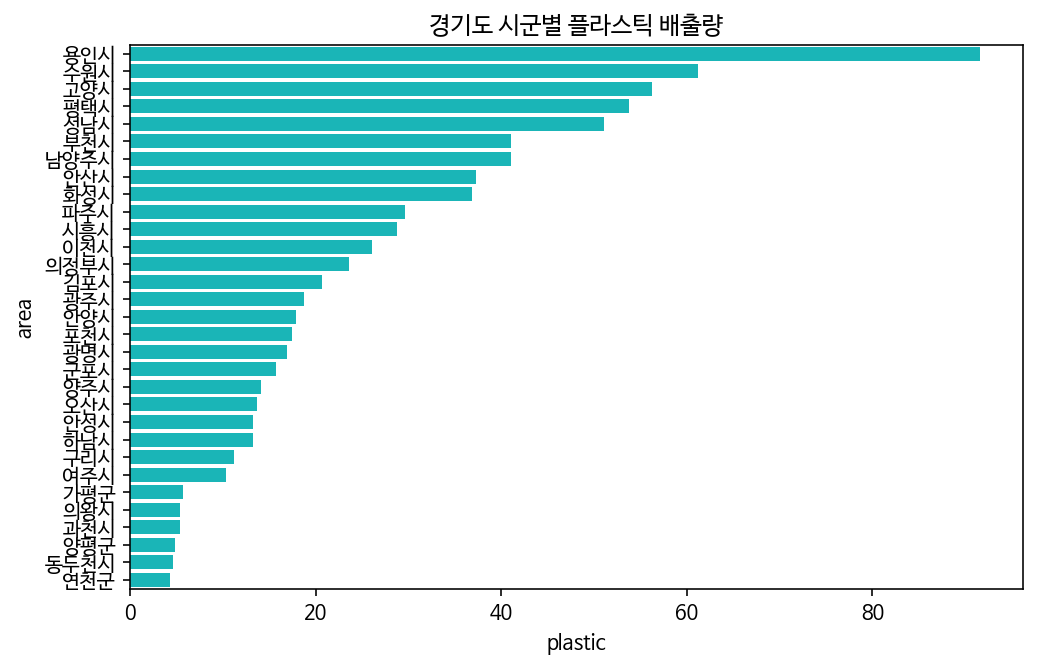

In [ ]:
sns.barplot(x="plastic", y="area", data=df2, color = 'darkturquoise')
plt.title("경기도 시군별 플라스틱 배출량")
plt.show()

**경기도 시군별 플라스틱 배출량은 용인시 - 수원시 - 고양시 - 평택시 - 성남시 순으로 많음을 확인할 수 있다.**

#2. 경기지역화폐 시군별 이용 현황

In [ ]:
df3 = df_pay.copy()

In [ ]:
df3.shape
df3.info()
df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531776 entries, 0 to 531775
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   분석인덱스    531776 non-null  int64 
 1   가맹점우편번호  531776 non-null  int64 
 2   성별코드     531776 non-null  object
 3   연령대코드    531776 non-null  object
 4   결제수      531776 non-null  int64 
 5   업종대분류명   531776 non-null  object
 6   상가수      531776 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 28.4+ MB


,분석인덱스,가맹점우편번호,성별코드,연령대코드,결제수,업종대분류명,상가수
0,0,10125,M,40,1,C제조업,15
1,1,10125,M,40,1,E하수·폐기물처리;원료재생및환경복원업,1
2,2,10125,M,40,1,F건설업,5
3,3,10125,M,40,1,G도매및소매업,52
4,4,10125,M,40,1,H운수업,9
...,...,...,...,...,...,...,...
531771,531771,18635,M,60,2,G도매및소매업,12
531772,531772,18635,M,60,2,H운수업,1
531773,531773,18635,M,60,2,I숙박및음식점업,4
531774,531774,18635,M,60,2,Q보건업및사회복지서비스업,1


In [ ]:
df3 = df3.drop('분석인덱스', axis=1)

In [ ]:
# 열 이름 수정
df3 = df3.rename(columns={'가맹점우편번호':'code'})
df3 = df3.rename(columns={'성별코드':'sex'})
df3 = df3.rename(columns={'연령대코드':'age'})
df3 = df3.rename(columns={'결제수':'payment'})
df3 = df3.rename(columns={'업종대분류명':'kind'})
df3 = df3.rename(columns={'상가수':'shop'})

In [ ]:
# area 열 새로 생성
df3['area'] = ""

i = 0
for i in range(0,531776):
    if 10000 <= df3['code'].iloc[i] <= 10136:
        df3['area'].iloc[i] = '부천시'
        i = i + 1
    elif 10200 <= df3['code'].iloc[i] <= 10599:
        df3['area'].iloc[i] = '고양시'
        i = i + 1
    elif 10800 <= df3['code'].iloc[i] <= 10955:
        df3['area'].iloc[i] = '파주시'
        i = i + 1
    elif 11000 <= df3['code'].iloc[i] <= 11050:
        df3['area'].iloc[i] = '연천군'
        i = i + 1
    elif 11100 <= df3['code'].iloc[i] <= 11192:
        df3['area'].iloc[i] = '포천시'
        i = i + 1
    elif 11300 <= df3['code'].iloc[i] <= 11366:
        df3['area'].iloc[i] = '동두천시'
        i = i + 1
    elif 11400 <= df3['code'].iloc[i] <= 11525:
        df3['area'].iloc[i] = '양주시'
        i = i + 1
    elif 11600 <= df3['code'].iloc[i] <= 11816:
        df3['area'].iloc[i] = '의정부시'
        i = i + 1
    elif 11900 <= df3['code'].iloc[i] <= 11962:
        df3['area'].iloc[i] = '구리시'
        i = i + 1
    elif 12000 <= df3['code'].iloc[i] <= 12285:
        df3['area'].iloc[i] = '남양주시'
        i = i + 1
    elif 12400 <= df3['code'].iloc[i] <= 12474:
        df3['area'].iloc[i] = '가평군'
        i = i + 1
    elif 12500 <= df3['code'].iloc[i] <= 12585:
        df3['area'].iloc[i] = '양평군'
        i = i + 1
    elif 12600 <= df3['code'].iloc[i] <= 12668:
        df3['area'].iloc[i] = '여주시'
        i = i + 1
    elif 12700 <= df3['code'].iloc[i] <= 12820:
        df3['area'].iloc[i] = '광주시'
        i = i + 1
    elif 12900 <= df3['code'].iloc[i] <= 13029:
        df3['area'].iloc[i] = '하남시'
        i = i + 1
    elif 13100 <= df3['code'].iloc[i] <= 13647:
        df3['area'].iloc[i] = '성남시'
        i = i + 1
    elif 13800 <= df3['code'].iloc[i] <= 13841:
        df3['area'].iloc[i] = '과천시'
        i = i + 1
    elif 13900 <= df3['code'].iloc[i] <= 14128:
        df3['area'].iloc[i] = '안양시'
        i = i + 1
    elif 14200 <= df3['code'].iloc[i] <= 14354:
        df3['area'].iloc[i] = '광명시'
        i = i + 1
    elif 14400 <= df3['code'].iloc[i] <= 14790:
        df3['area'].iloc[i] = '부천시'
        i = i + 1
    elif 14900 <= df3['code'].iloc[i] <= 15119:
        df3['area'].iloc[i] = '시흥시'
        i = i + 1
    elif 15200 <= df3['code'].iloc[i] <= 15658:
        df3['area'].iloc[i] = '안산시'
        i = i + 1
    elif 15800 <= df3['code'].iloc[i] <= 15892:
        df3['area'].iloc[i] = '군포시'
        i = i + 1
    elif 16000 <= df3['code'].iloc[i] <= 16109:
        df3['area'].iloc[i] = '의왕시'
        i = i + 1
    elif 16200 <= df3['code'].iloc[i] <= 16714:
        df3['area'].iloc[i] = '수원시'
        i = i + 1
    elif 16800 <= df3['code'].iloc[i] <= 17183:
        df3['area'].iloc[i] = '용인시'
        i = i + 1
    elif 17300 <= df3['code'].iloc[i] <= 17424:
        df3['area'].iloc[i] = '이천시'
        i = i + 1
    elif 17500 <= df3['code'].iloc[i] <= 17609:
        df3['area'].iloc[i] = '안성시'
        i = i + 1
    elif 17700 <= df3['code'].iloc[i] <= 18034:
        df3['area'].iloc[i] = '평택시'
        i = i + 1
    elif 18100 <= df3['code'].iloc[i] <= 18151:
        df3['area'].iloc[i] = '오산시'
        i = i + 1
    elif 18200 <= df3['code'].iloc[i] <= 18635:
        df3['area'].iloc[i] = '화성시'
        i = i + 1
df3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,code,sex,age,payment,kind,shop,area
0,10125,M,40,1,C제조업,15,부천시
1,10125,M,40,1,E하수·폐기물처리;원료재생및환경복원업,1,부천시
2,10125,M,40,1,F건설업,5,부천시
3,10125,M,40,1,G도매및소매업,52,부천시
4,10125,M,40,1,H운수업,9,부천시
...,...,...,...,...,...,...,...
531771,18635,M,60,2,G도매및소매업,12,화성시
531772,18635,M,60,2,H운수업,1,화성시
531773,18635,M,60,2,I숙박및음식점업,4,화성시
531774,18635,M,60,2,Q보건업및사회복지서비스업,1,화성시


In [ ]:
df4 = df3.copy()

In [ ]:
df4.groupby(['area','sex','age','kind']).mean().reset_index()

,area,sex,age,kind,code,payment,shop
0,가평군,F,10,A농업;임업및어업,12452,4,2
1,가평군,F,10,C제조업,124202,56,23
2,가평군,F,10,E하수·폐기물처리;원료재생및환경복원업,49673,28,4
3,가평군,F,10,F건설업,124221,60,23
4,가평군,F,10,G도매및소매업,161472,66,232
...,...,...,...,...,...,...,...
9002,화성시,M,80,O공공행정;국방및사회보장행정,37022,10,2
9003,화성시,M,80,P교육서비스업,830745,167,607
9004,화성시,M,80,Q보건업및사회복지서비스업,129407,39,9
9005,화성시,M,80,R예술;스포츠및여가관련서비스업,739146,151,372


In [ ]:
df4.loc[df4['sex'].str.contains('M',na=False), 'sex'] = 1
df4.loc[df4['sex'].str.contains('F',na=False), 'sex'] = 2

In [ ]:
df4.loc[df4['kind'].str.contains('A'), 'kind'] = 'A'
df4.loc[df4['kind'].str.contains('B'), 'kind'] = 'B'
df4.loc[df4['kind'].str.contains('C'), 'kind'] = 'C'
df4.loc[df4['kind'].str.contains('D'), 'kind'] = 'D'
df4.loc[df4['kind'].str.contains('E'), 'kind'] = 'E'
df4.loc[df4['kind'].str.contains('F'), 'kind'] = 'F'
df4.loc[df4['kind'].str.contains('G'), 'kind'] = 'G'
df4.loc[df4['kind'].str.contains('H'), 'kind'] = 'H'
df4.loc[df4['kind'].str.contains('I'), 'kind'] = 'I'
df4.loc[df4['kind'].str.contains('J'), 'kind'] = 'J'
df4.loc[df4['kind'].str.contains('K'), 'kind'] = 'K'
df4.loc[df4['kind'].str.contains('L'), 'kind'] = 'L'
df4.loc[df4['kind'].str.contains('M'), 'kind'] = 'M'
df4.loc[df4['kind'].str.contains('N'), 'kind'] = 'N'
df4.loc[df4['kind'].str.contains('O'), 'kind'] = 'O'
df4.loc[df4['kind'].str.contains('P'), 'kind'] = 'P'
df4.loc[df4['kind'].str.contains('Q'), 'kind'] = 'Q'
df4.loc[df4['kind'].str.contains('R'), 'kind'] = 'R'
df4.loc[df4['kind'].str.contains('S'), 'kind'] = 'S'
df4.loc[df4['kind'].str.contains('T'), 'kind'] = 'T'

In [ ]:
# 음식숙박업만 남기기
df4 = df4[df4.kind !='A']
df4 = df4[df4.kind !='B']
df4 = df4[df4.kind !='C']
df4 = df4[df4.kind !='D']
df4 = df4[df4.kind !='E']
df4 = df4[df4.kind !='F']
df4 = df4[df4.kind !='G']
df4 = df4[df4.kind !='H']
df4 = df4[df4.kind !='J']
df4 = df4[df4.kind !='K']
df4 = df4[df4.kind !='L']
df4 = df4[df4.kind !='M']
df4 = df4[df4.kind !='N']
df4 = df4[df4.kind !='O']
df4 = df4[df4.kind !='P']
df4 = df4[df4.kind !='Q']
df4 = df4[df4.kind !='R']
df4 = df4[df4.kind !='S']
df4 = df4[df4.kind !='T']
df4 = df4[df4.kind !='기타']
df4 = df4[df4.age != '90+']

In [ ]:
df4['age'] = df4['age'].astype(int)

In [ ]:
# 기술통계량 확인
df4.describe()

,code,age,payment,shop
count,52779.000000,52779.000000,52779.000000,52779.000000
mean,14290.104265,41.822126,146.746736,25.561776
std,2497.115145,19.415493,518.425185,32.555328
min,10125.000000,10.000000,1.000000,1.000000
25%,12040.000000,30.000000,5.000000,7.000000
50%,14523.000000,40.000000,26.000000,15.000000
75%,16464.000000,60.000000,104.000000,31.000000
max,18635.000000,90.000000,35306.000000,388.000000


In [ ]:
df444 = df4.groupby(['area']).mean()

In [ ]:
df444 = df444.sort_values(by='payment',ascending=False)

In [ ]:
df444 = df444.reset_index()

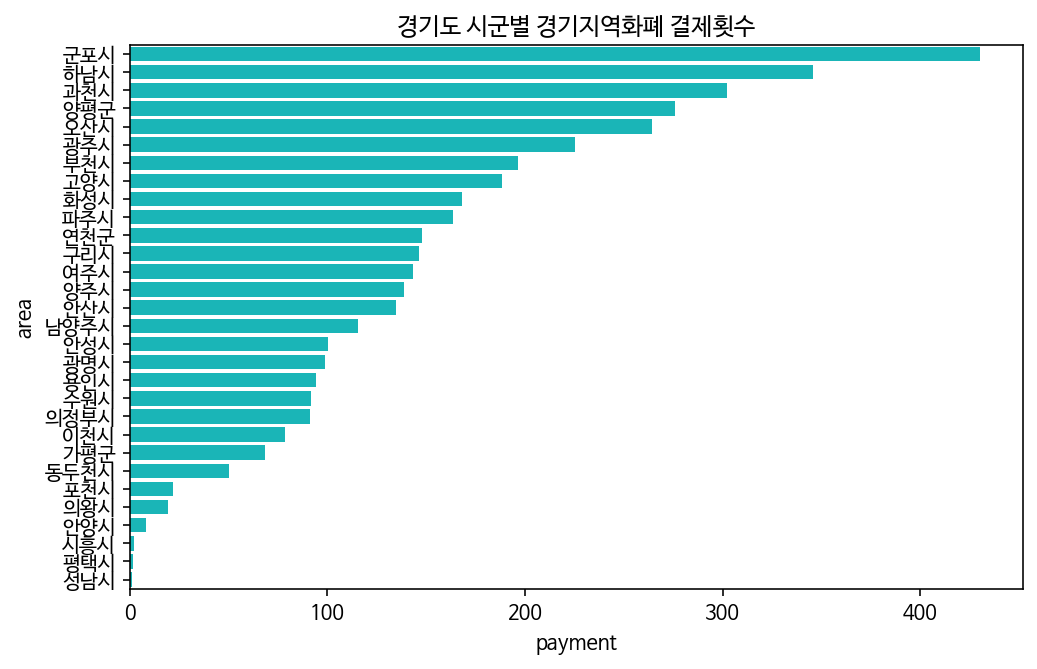

In [ ]:
sns.barplot(x="payment", y="area", data=df444, color = 'darkturquoise')
plt.title("경기도 시군별 경기지역화폐 결제횟수")
plt.show()

In [ ]:
df5 = df_pay2.copy()

In [ ]:
df5.shape
df5.info()
df5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시군명                837 non-null    object 
 1   기준년월               837 non-null    object 
 2   월별카드발행수량(건)        678 non-null    float64
 3   월별카드충전액(천원)        696 non-null    float64
 4   월별카드사용액(천원)        696 non-null    float64
 5   월별모바일상품권이용등록자수(명)  77 non-null     float64
 6   월별모바일충전액(천원)       76 non-null     float64
 7   월별모바일사용액(천원)       77 non-null     float64
 8   월별지류상품권판매액(천원)     234 non-null    float64
 9   월별지류상품권회수액(천원)     234 non-null    float64
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(9), object(2)
memory usage: 72.1+ KB


,시군명,기준년월,월별카드발행수량(건),월별카드충전액(천원),월별카드사용액(천원),월별모바일상품권이용등록자수(명),월별모바일충전액(천원),월별모바일사용액(천원),월별지류상품권판매액(천원),월별지류상품권회수액(천원),Unnamed: 10
0,가평군,2021-03,1084.0,912711.0,805968.0,NaN,NaN,NaN,143740.0,138405.0,NaN
1,가평군,2021-02,1809.0,912711.0,805968.0,NaN,NaN,NaN,143740.0,138405.0,NaN
2,가평군,2021-01,598.0,992759.0,1011708.0,NaN,NaN,NaN,120450.0,145020.0,NaN
3,가평군,2020-12,579.0,1177615.0,1121896.0,NaN,NaN,NaN,190105.0,158030.0,NaN
4,가평군,2020-11,524.0,1014259.0,991877.0,NaN,NaN,NaN,141540.0,602190.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
832,화성시,2019-05,10661.0,4449088.0,1392631.0,NaN,NaN,NaN,NaN,NaN,NaN
833,화성시,2019-04,4826.0,1476982.0,204210.0,NaN,NaN,NaN,NaN,NaN,NaN
834,화성시,2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,화성시,2019-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 2019.10-2020.06 만 남기기
df5 = df5[df5.기준년월 !='2021-03']
df5 = df5[df5.기준년월 !='2021-02']
df5 = df5[df5.기준년월 !='2021-01']
df5 = df5[df5.기준년월 !='2020-12']
df5 = df5[df5.기준년월 !='2020-11']
df5 = df5[df5.기준년월 !='2020-10']
df5 = df5[df5.기준년월 !='2020-09']
df5 = df5[df5.기준년월 !='2020-08']
df5 = df5[df5.기준년월 !='2020-07']
df5 = df5[df5.기준년월 !='2019-09']
df5 = df5[df5.기준년월 !='2019-08']
df5 = df5[df5.기준년월 !='2019-07']
df5 = df5[df5.기준년월 !='2019-06']
df5 = df5[df5.기준년월 !='2019-05']
df5 = df5[df5.기준년월 !='2019-04']
df5 = df5[df5.기준년월 !='2019-03']
df5 = df5[df5.기준년월 !='2019-02']
df5 = df5[df5.기준년월 !='2019-01']

In [ ]:
# 필요한 열만 보기
df5 = df5.loc[:,['시군명','월별카드발행수량(건)','월별모바일상품권이용등록자수(명)']]

In [ ]:
# 결측값 처리
df5['월별카드발행수량(건)'] = df5['월별카드발행수량(건)'].fillna(0)
df5['월별모바일상품권이용등록자수(명)'] = df5['월별모바일상품권이용등록자수(명)'].fillna(0)

In [ ]:
# 열 이름 수정
df5 = df5.rename(columns={'시군명':'area'})
df5 = df5.rename(columns={'월별카드발행수량(건)':'card'})
df5 = df5.rename(columns={'월별모바일상품권이용등록자수(명)':'mobile'})

In [ ]:
df5['total']= df5['card'] + df5['mobile']

In [ ]:
# 기술통계량 분석
df5.describe()

,card,mobile,total
count,279.000000,279.000000,279.000000
mean,10698.720430,969.157706,11667.878136
std,28578.707986,4082.749119,28506.127420
min,0.000000,0.000000,55.000000
25%,661.500000,0.000000,1186.500000
50%,2189.000000,0.000000,3230.000000
75%,6618.500000,0.000000,7988.500000
max,279776.000000,30868.000000,279776.000000


In [ ]:
df55 = df5.groupby('area').mean()

In [ ]:
df55.reset_index(inplace=True)

In [ ]:
df55 = df55.sort_values(by='total', ascending=False)

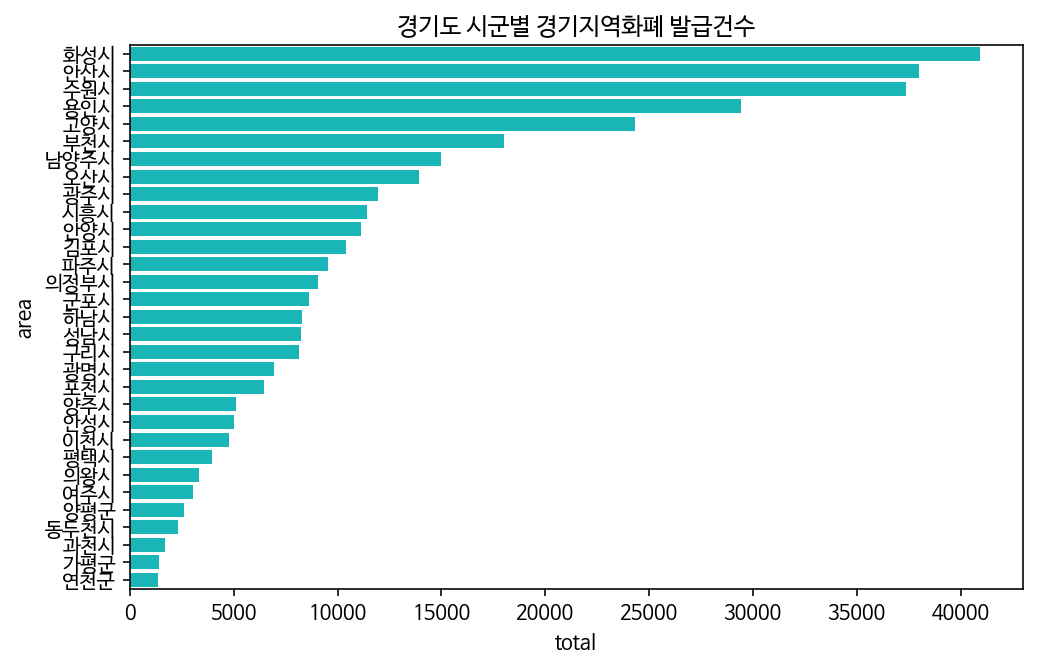

In [ ]:
sns.barplot(x="total", y="area", data=df55, color = 'darkturquoise')
plt.title("경기도 시군별 경기지역화폐 발급건수")
plt.show()

경기도 시군별 플라스틱 배출량 : 용인시 > 수원시 > 고양시 > 평택시 > 성남시

경기도 시군별 경기지역화폐 결제횟수 : 군포시 > 하남시 > 과천시 > 양평군 > 오산시

경기도 시군별 경기지역화폐 발급건수 : 화성시 > 안산시 > 수원시 > 용인시 > 고양시

**▶insight : 경기도 시군별 플라스틱 배출량 상위 5개 시도와 경기도 시군별 경기지역화폐 발급건수 상위 5개 시도 중에서 공통된 지역인 용인시, 수원시, 고양시가 포함되어 있어 플라스틱 배출량과 경기지역화폐 발급건수 사이에 상관관계가 존재할 것으로 판단한다.**

# 4.검증

##데이터 탐색

In [ ]:
data1 = df5.groupby('area')['total'].mean()

In [ ]:
df2.set_index('area',inplace=True)

In [ ]:
df22 = df2.sort_values(by='area')

In [ ]:
data2 = pd.concat([data1,df22,df444],axis =1 )

In [ ]:
data2

,total,waste,plastic,code,age,payment,shop
가평군,12655.0,95.5,5.730,12434.292808,41.969178,68.549658,16.015411
고양시,218954.0,936.9,56.214,10392.065106,42.537347,188.591304,28.646823
과천시,15100.0,89.2,5.352,13820.754569,43.133159,302.407311,13.381201
광명시,62319.0,282.0,16.920,14272.166078,41.313310,98.548881,20.706714
광주시,107355.0,312.2,18.732,12763.049893,42.494654,225.095510,26.557377
구리시,73131.0,187.4,11.244,11930.447989,42.524272,146.177531,35.504854
군포시,77431.0,262.5,15.750,15844.835165,44.026688,430.445840,31.879121
김포시,93464.0,344.9,20.694,NaN,NaN,NaN,NaN
남양주시,134726.0,684.4,41.064,12145.975523,41.863757,115.403421,19.391920
동두천시,21049.0,76.9,4.614,11334.988811,42.601399,50.124476,22.706294


In [ ]:
data2.dropna(how='any', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data2 = data2[['total','plastic','payment','shop']]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


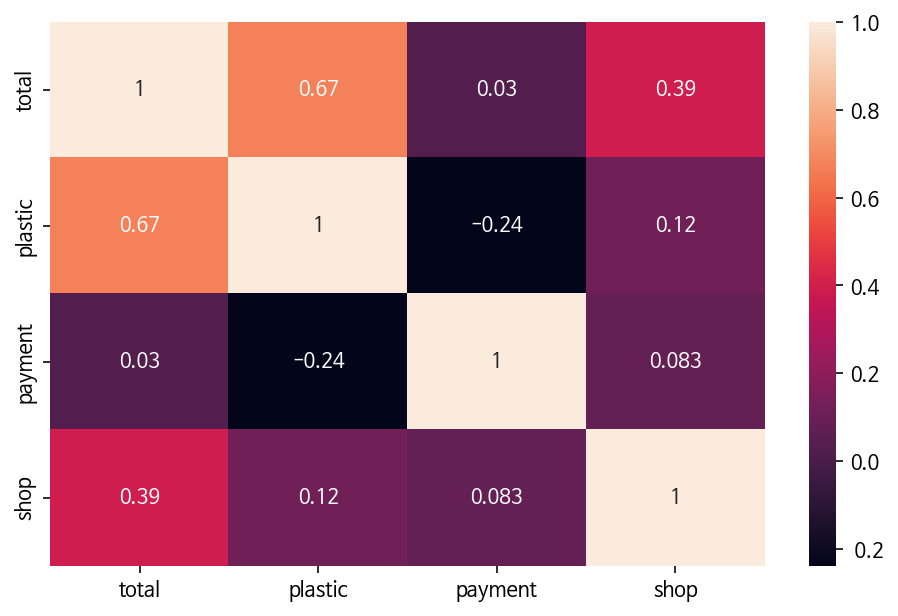

In [ ]:
# 변수 간 상관관계
corr = data2.corr()
sns.heatmap(corr,annot=True)

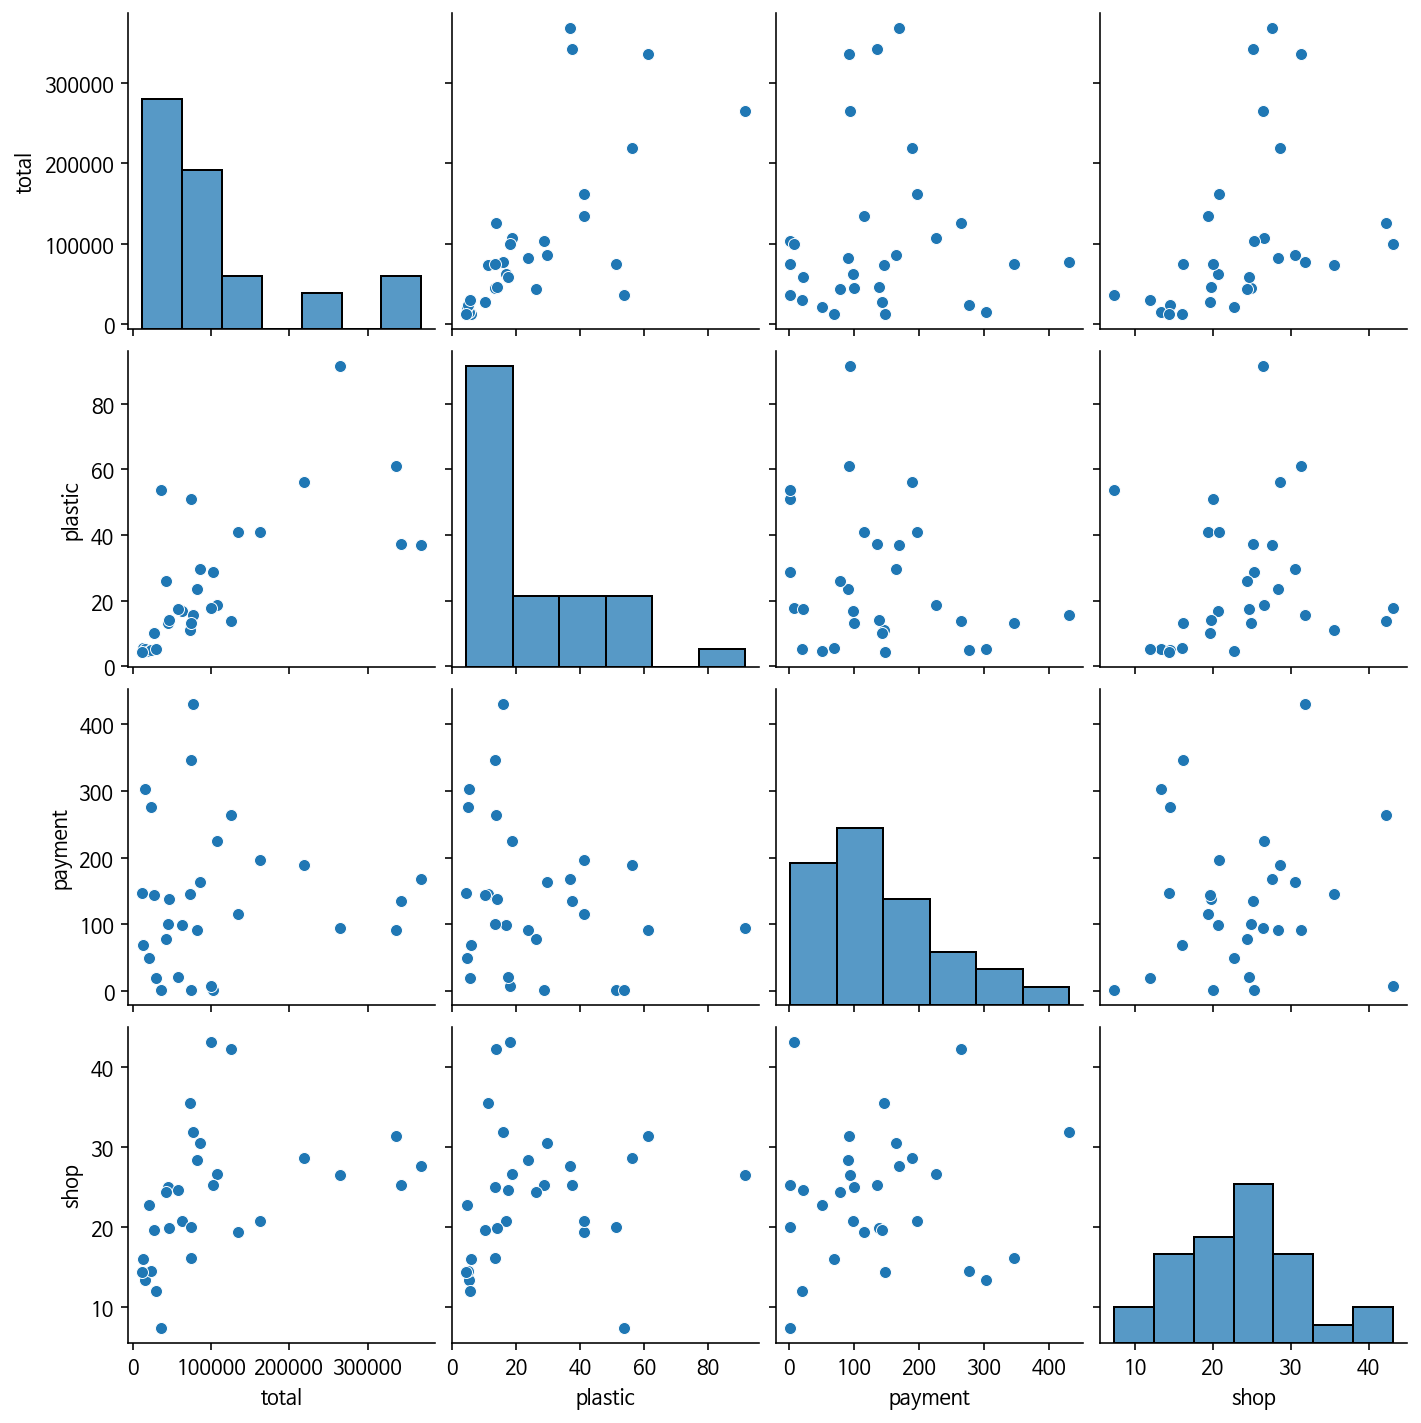

In [ ]:
# 변수 간 관계 시각화
sns.pairplot(data2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


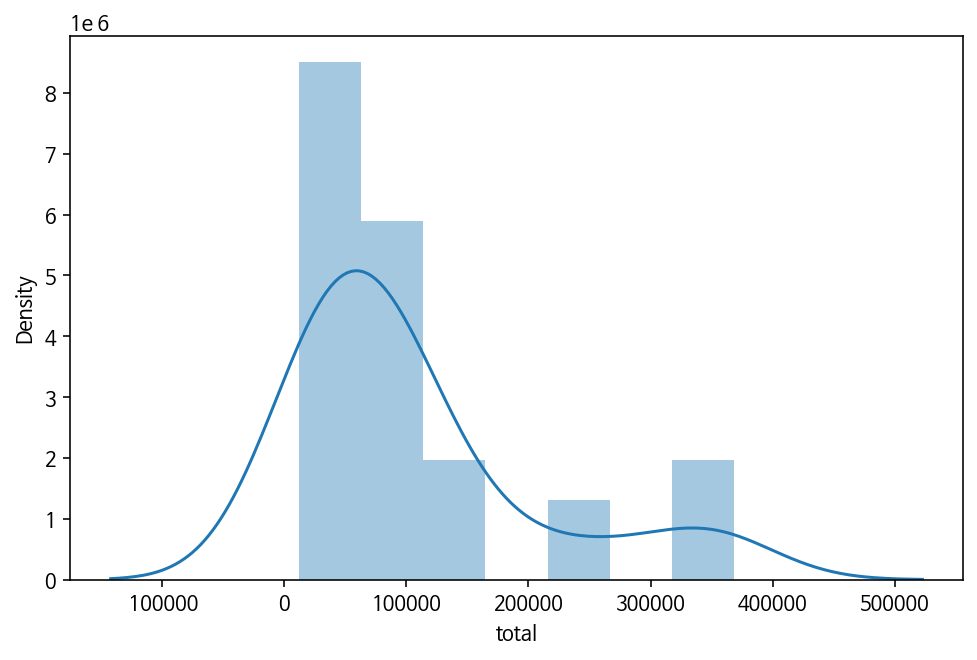

In [ ]:
# 변수 분포 확인
sns.distplot(data2['total'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


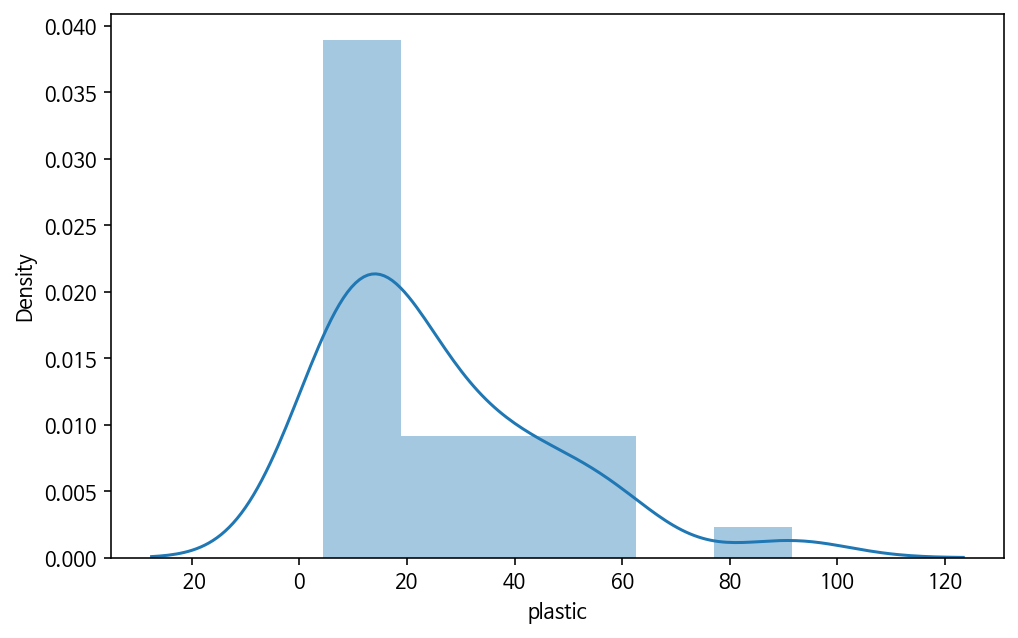

In [ ]:
sns.distplot(data2['plastic'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


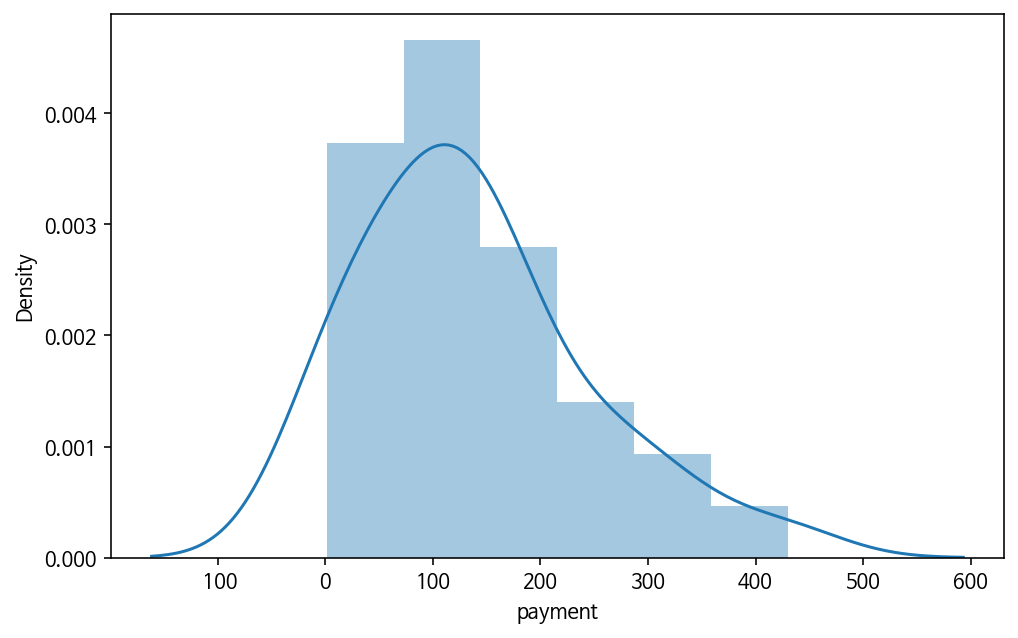

In [ ]:
sns.distplot(data2['payment'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


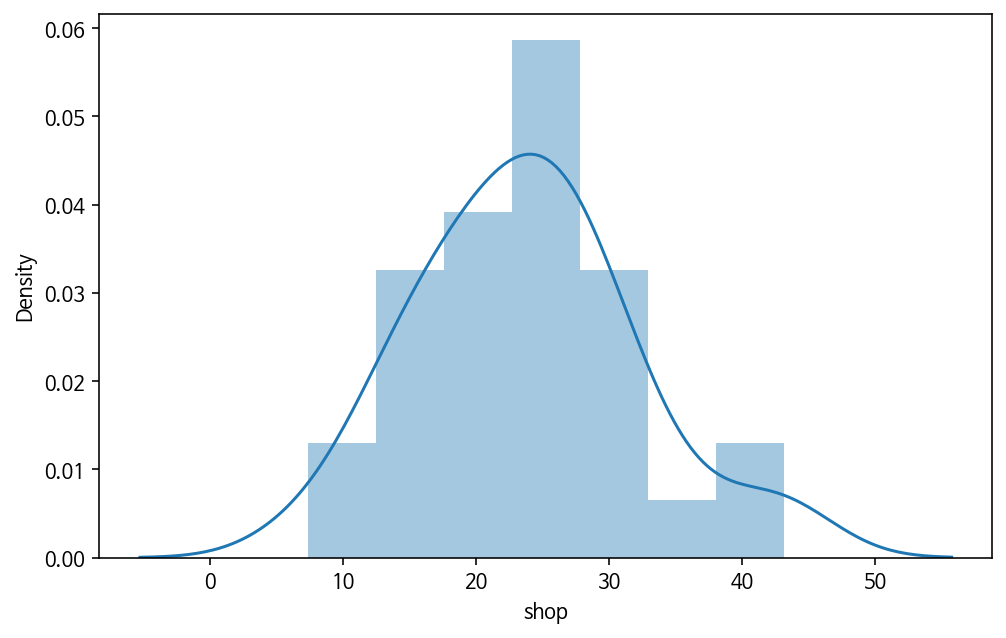

In [ ]:
sns.distplot(data2['shop'])

In [ ]:
# 플라스틱 배출량과 시도별 경기지역화페 발행건수 간의 상관관계가 있다는 것을 알 수 있다.

## 데이터 분석

In [ ]:
# var에 분석에 사용할 변수의 값을 넣는다.
var = data2[['total','plastic','payment','shop']].values

In [ ]:
# inertia라는 빈 리스트를 만든다.
inertia = []

In [ ]:
# 군집수 n을 1에서 11까지 돌아가며 var에 대해 k-means 알고리즘을 적용하여 inertia 값을 리스트에 저장한다.
for n in range(1,11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(var)
    inertia.append(algorithm.inertia_)

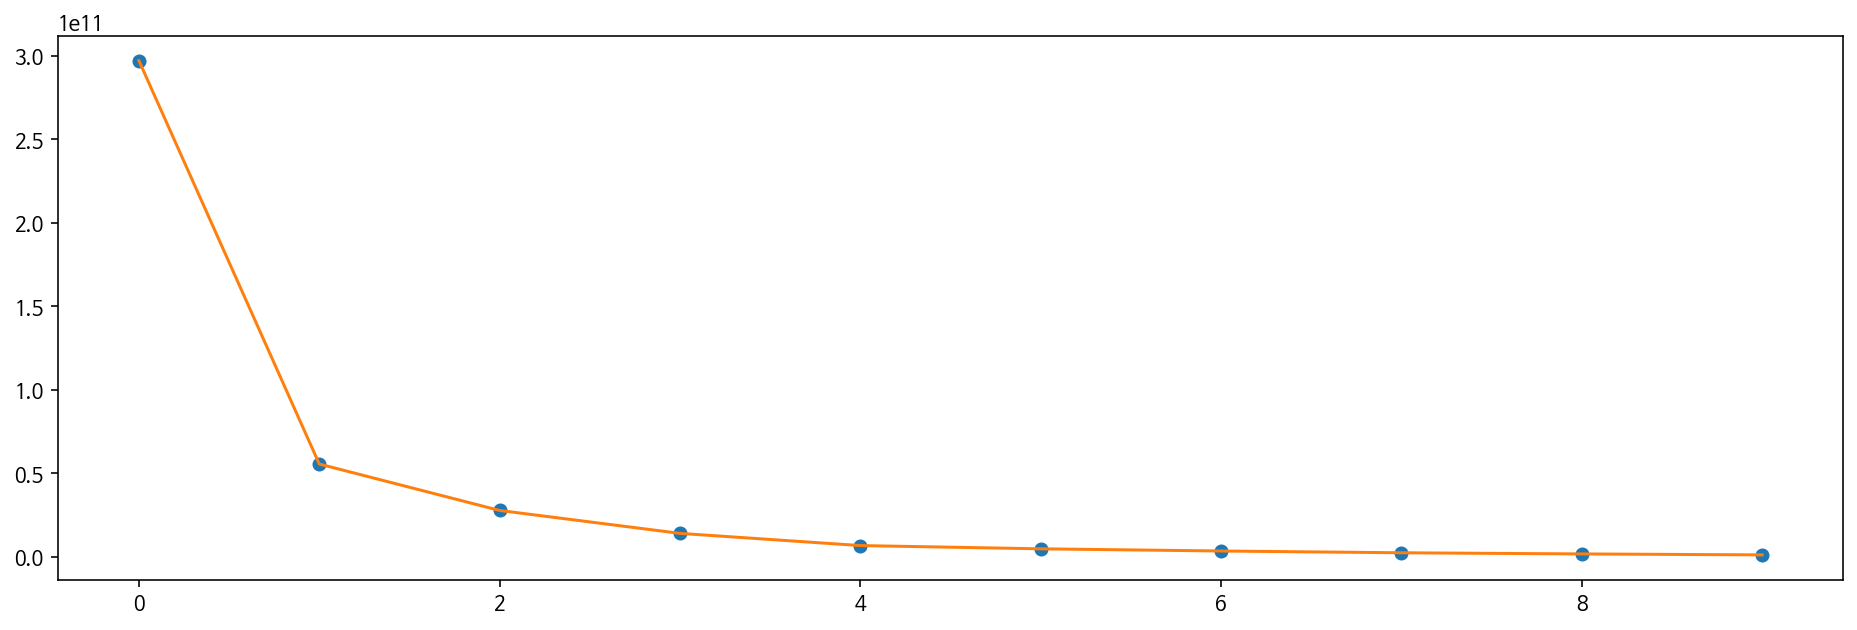

In [ ]:
# inertia 값을 시각화한다.
plt.figure(1, figsize = (16,5))
plt.plot(inertia, 'o')
plt.plot(inertia, '-')

In [ ]:
# 군집수를 4로 지정하고, 기존 데이터셋에 클러스터 값을 넣는다.
algorithm = (KMeans(n_clusters = 4,random_state=111))
algorithm.fit(var)
labells = algorithm.labels_

In [ ]:
data2['cluster'] = labells
data2

,total,plastic,payment,shop,cluster
가평군,12655.0,5.730,68.549658,16.015411,1
고양시,218954.0,56.214,188.591304,28.646823,0
과천시,15100.0,5.352,302.407311,13.381201,1
광명시,62319.0,16.920,98.548881,20.706714,1
광주시,107355.0,18.732,225.095510,26.557377,3
구리시,73131.0,11.244,146.177531,35.504854,3
군포시,77431.0,15.750,430.445840,31.879121,3
남양주시,134726.0,41.064,115.403421,19.391920,3
동두천시,21049.0,4.614,50.124476,22.706294,1
부천시,162246.0,41.094,196.278782,20.783553,3


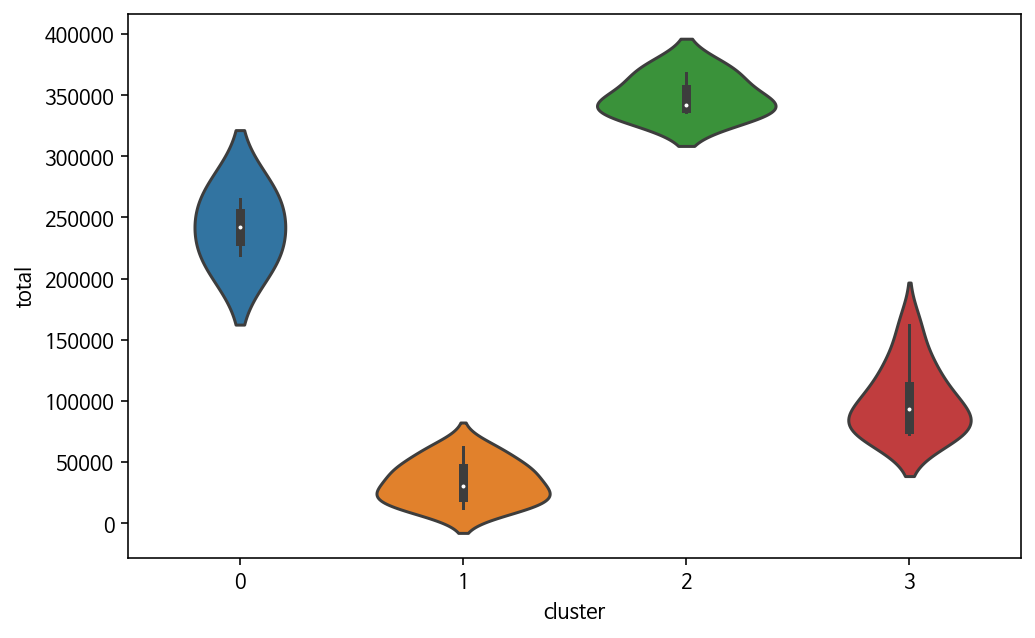

In [ ]:
# 클러스터 특성 파악
sns.violinplot(x='cluster',y='total',data=data2)

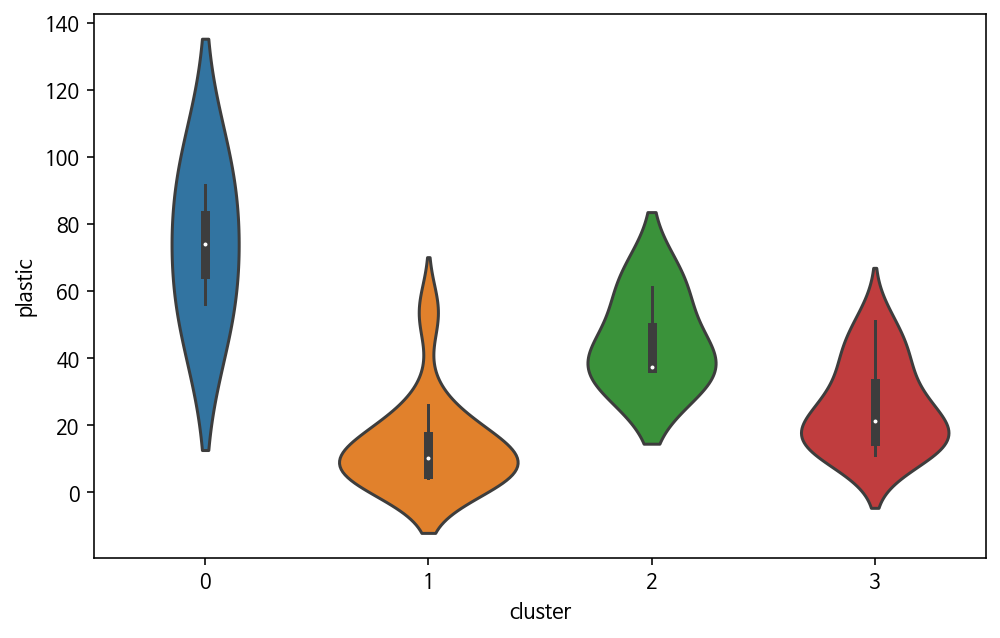

In [ ]:
sns.violinplot(x='cluster',y='plastic',data=data2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


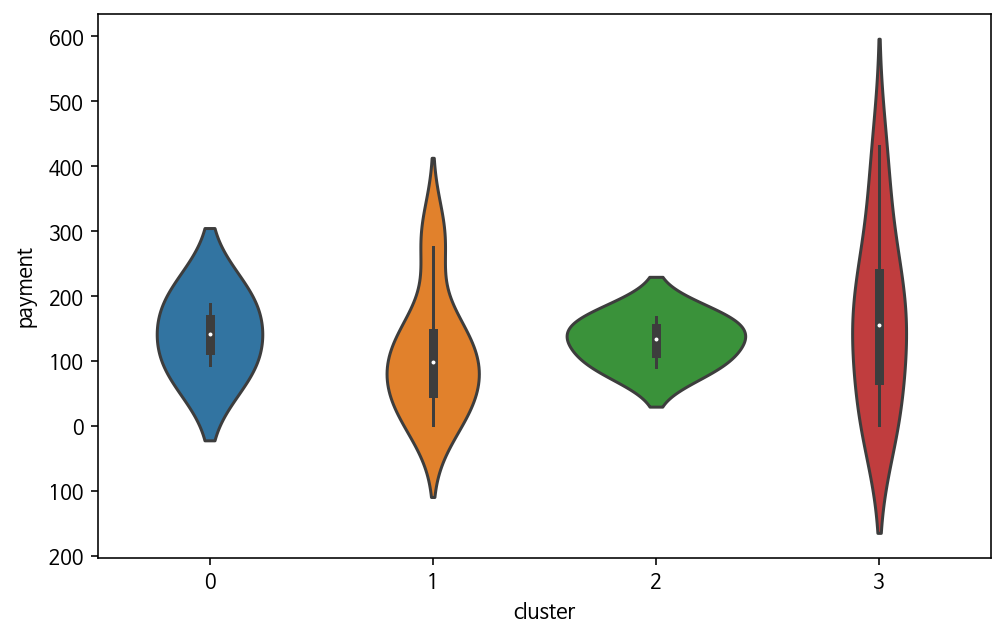

In [ ]:
sns.violinplot(x='cluster',y='payment',data=data2)

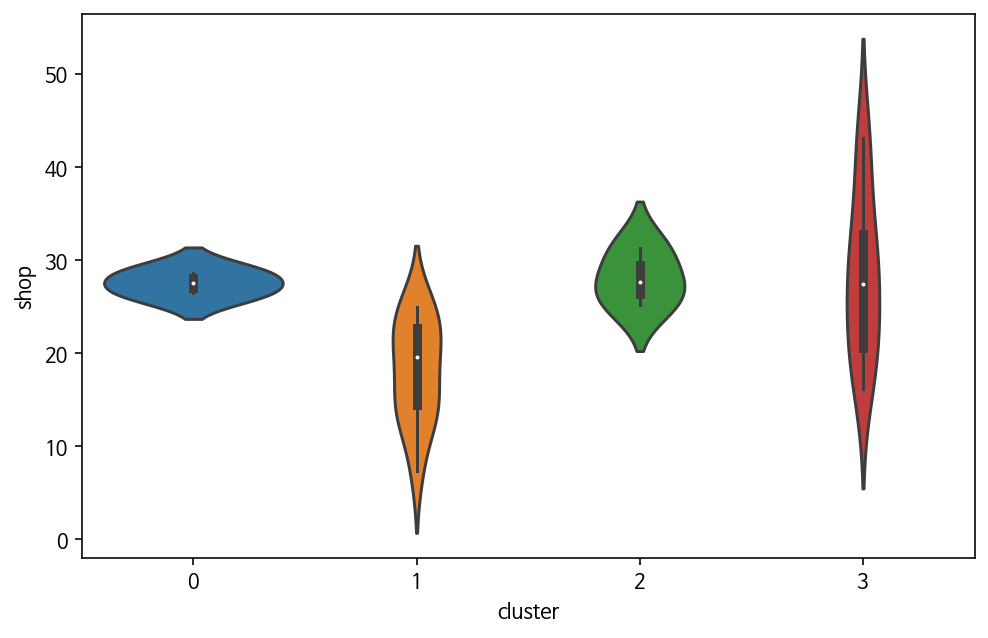

In [ ]:
sns.violinplot(x='cluster',y='shop',data=data2)

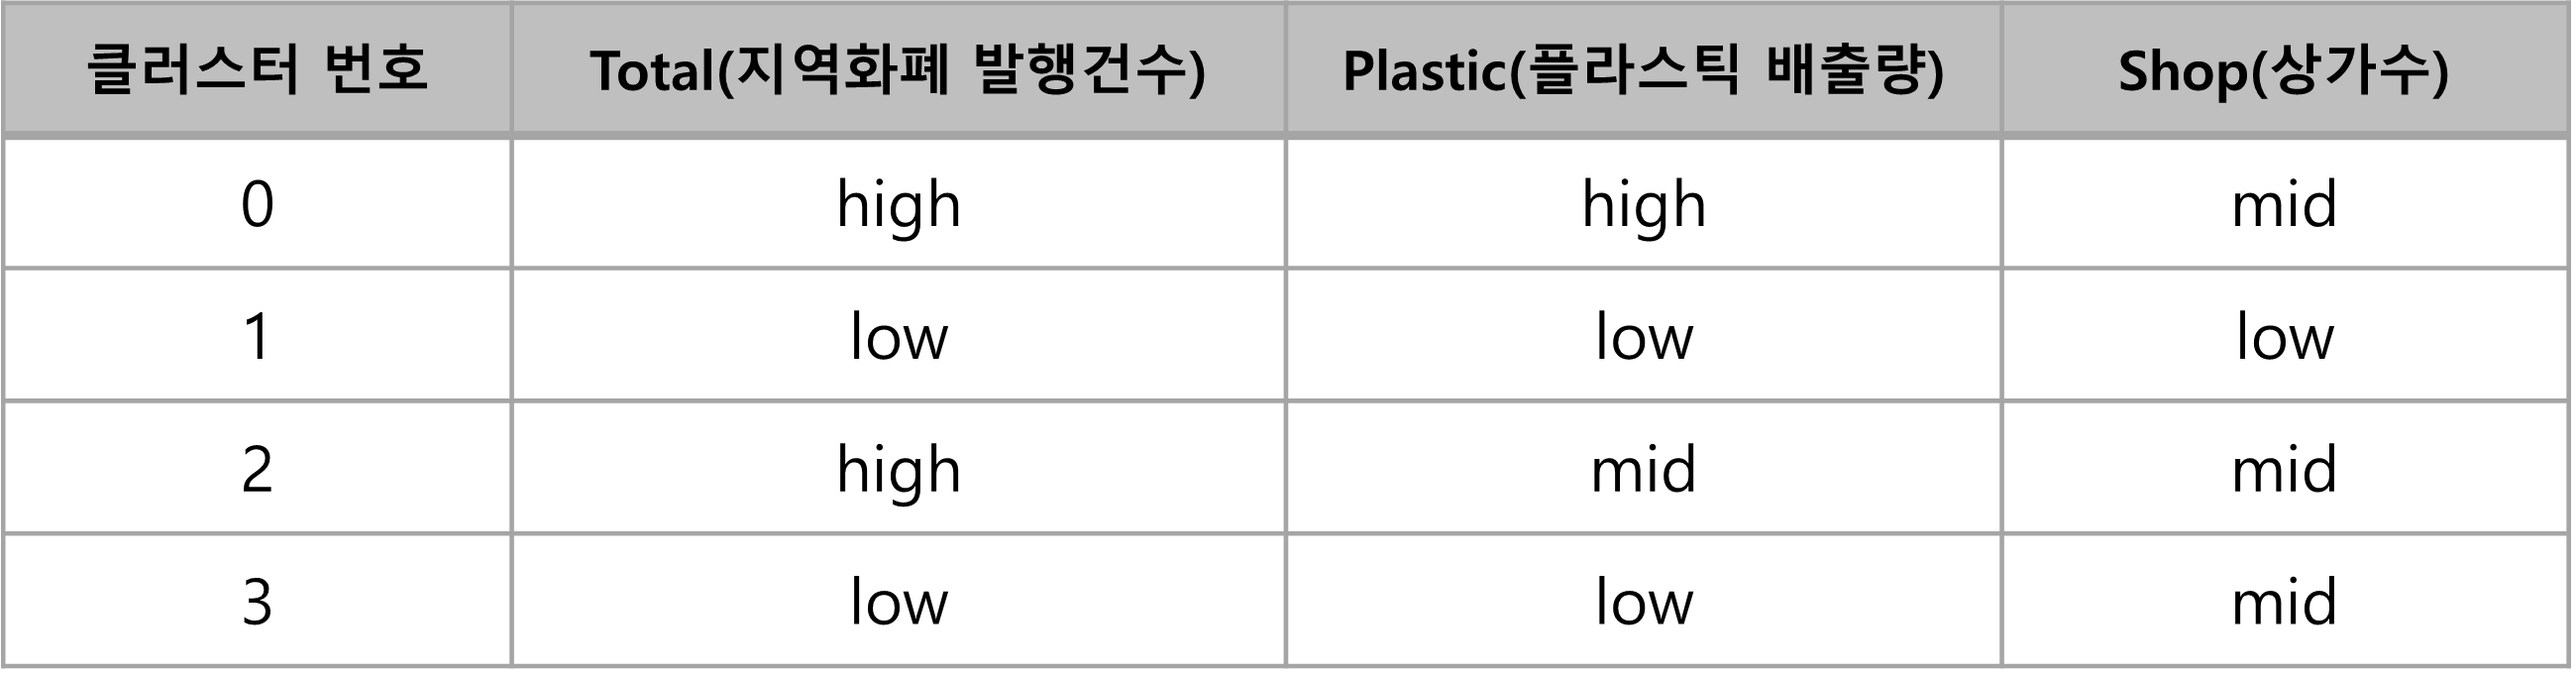

  클러스터 번호 0은 지역화폐 발행건수와 플라스틱 배출량이 모두 높은 지역군이고 클러스터 2는 플라스틱 배출량은 중간 정도이지만 지역화폐 발생건수가 높다. 따라서 캠페인이 실시된다면 참가율이 높을 것으로 해석된다.

  반면 클러스터 1과 클러스터 3은 지역화폐 발행건수와 플라스틱 배출량이 모두 낮은 지역군이다. 즉 지역화폐의 사용률이 낮다고 해석가능하다. 클러스터 1은 지역화폐 가맹점인 상가의 수도 적다. 클러스터 1의 캠페인 참가율을 높이기 위해서는 지역화폐 가맹점이 늘어야 한다. 지역화폐 가맹점이 캠페인 참가 시 인센티브를 제공하는 것이 필요하다.